In [97]:
import pandas as pd 
import matplotlib.pyplot as plt
from pyproj import Proj, transform
import re


# Qualité de l'air en bretagne

## Choix du jeu de donnée

Afin d'annalyser l'impact du confinement sur la Qualité de l'air, il nous faut un dataset qui receuille les donnée sur la période selectionnée. Le seul disponible est le suivant :

[ Indice quotidien de qualité de l’air pour les collectivités territoriales pour l’année civile en cours jusqu’au lendemain et l’année précédente complète.](https://data.airbreizh.asso.fr/geonetwork/srv/fre/catalog.search;jsessionid=0EE6B796E3DB9AAD86B9F12A5446662D#/metadata/fr-404453110-ind-bretagne)

## Analyse des données disponible

In [98]:
data=pd.read_csv('ind_bretagne_agglo.csv',sep=',')

print('Les différentes données sont disponibles :')
for info in data.columns:
    print(info)

Les différentes données sont disponibles :
FID
date_ech
valeur
qualif
source
type_zone
code_zone
lib_zone
val_no2
val_so2
val_o3
val_pm10
val_pm25
geom
couleur


Nous avons donc acces a un indice compris entre 1 et 5 nous permettant de juger de la qualité de l'air. C'est ce dernier que nous allons etudier pour la région bretagne.

In [99]:
data.head()

,FID,date_ech,valeur,qualif,source,type_zone,code_zone,lib_zone,val_no2,val_so2,val_o3,val_pm10,val_pm25,geom,couleur
0,ind_bretagne_agglo.fid--15c6355_17742f5266a_10d4,2021-01-01T10:00:00,3,Bon,Air Breizh,EPCI,200069409,CA Saint-Brieuc Armor,0,0,0,0,0,POINT (269153.2682993477 6832824.934141148),#99E600
1,ind_bretagne_agglo.fid--15c6355_17742f5266a_10d5,2021-01-01T10:00:00,3,Bon,Air Breizh,EPCI,200067932,CA Golfe du Morbihan - Vannes,0,0,0,0,0,POINT (269961.1106939723 6746307.8992528645),#99E600
2,ind_bretagne_agglo.fid--15c6355_17742f5266a_10d6,2021-01-01T10:00:00,3,Bon,Air Breizh,EPCI,200068120,CA Quimper Bretagne Occidentale,0,0,0,0,0,POINT (172753.63056731108 6795400.543816281),#99E600
3,ind_bretagne_agglo.fid--15c6355_17742f5266a_10d7,2021-01-01T10:00:00,3,Bon,Air Breizh,EPCI,243500139,Rennes Métropole,0,0,0,0,0,POINT (349555.0070453745 6789093.386528317),#99E600
4,ind_bretagne_agglo.fid--15c6355_17742f5266a_10d8,2021-01-01T10:00:00,3,Bon,Air Breizh,EPCI,243500782,CA du Pays de Saint-Malo (Saint-Malo Aggloméra...,0,0,0,0,0,POINT (338719.75810268405 6844013.788199687),#99E600


In [100]:


data['date']=pd.to_datetime(data["date_ech"])

data['year'] = pd.DatetimeIndex(data['date']).year
data['month'] = pd.DatetimeIndex(data['date']).month
data['day'] = pd.DatetimeIndex(data['date']).day
data=data.drop('date_ech',axis=1)

In [101]:
data.head()

,FID,valeur,qualif,source,type_zone,code_zone,lib_zone,val_no2,val_so2,val_o3,val_pm10,val_pm25,geom,couleur,date,year,month,day
0,ind_bretagne_agglo.fid--15c6355_17742f5266a_10d4,3,Bon,Air Breizh,EPCI,200069409,CA Saint-Brieuc Armor,0,0,0,0,0,POINT (269153.2682993477 6832824.934141148),#99E600,2021-01-01 10:00:00,2021,1,1
1,ind_bretagne_agglo.fid--15c6355_17742f5266a_10d5,3,Bon,Air Breizh,EPCI,200067932,CA Golfe du Morbihan - Vannes,0,0,0,0,0,POINT (269961.1106939723 6746307.8992528645),#99E600,2021-01-01 10:00:00,2021,1,1
2,ind_bretagne_agglo.fid--15c6355_17742f5266a_10d6,3,Bon,Air Breizh,EPCI,200068120,CA Quimper Bretagne Occidentale,0,0,0,0,0,POINT (172753.63056731108 6795400.543816281),#99E600,2021-01-01 10:00:00,2021,1,1
3,ind_bretagne_agglo.fid--15c6355_17742f5266a_10d7,3,Bon,Air Breizh,EPCI,243500139,Rennes Métropole,0,0,0,0,0,POINT (349555.0070453745 6789093.386528317),#99E600,2021-01-01 10:00:00,2021,1,1
4,ind_bretagne_agglo.fid--15c6355_17742f5266a_10d8,3,Bon,Air Breizh,EPCI,243500782,CA du Pays de Saint-Malo (Saint-Malo Aggloméra...,0,0,0,0,0,POINT (338719.75810268405 6844013.788199687),#99E600,2021-01-01 10:00:00,2021,1,1


In [102]:
dataBretagneMean=data[data['year']==2020].groupby(['year','month']).mean()
dataBretagneMean

valeur     code_zone   val_no2  val_so2    val_o3  val_pm10  \
year month                                                                  
2020 1      3.548837  2.183666e+08  1.590698      0.0  3.181395  3.055814   
     2      3.743316  2.178682e+08  1.315508      0.0  3.508021  3.085561   
     3      4.214953  2.184465e+08  1.303738      0.0  3.780374  3.542056   
     4      4.564593  2.184735e+08  1.124402      0.0  4.325359  3.660287   
     5      4.308756  2.185927e+08  1.046083      0.0  4.281106  2.488479   
     6      3.847619  2.185927e+08  1.095238      0.0  3.842857  2.309524   
     7      3.442396  2.185927e+08  1.064516      0.0  3.428571  2.156682   
     8      3.682028  2.185927e+08  1.078341      0.0  3.566820  2.433180   
     9      3.776190  2.185927e+08  1.380952      0.0  3.714286  2.619048   
     10     3.105991  2.185927e+08  1.262673      0.0  3.041475  2.451613   
     11     3.428571  2.185927e+08  1.442857      0.0  2.819048  3.185714   
     12     3.055300  2.185927e+08  1.442396      0.0  2.857143  2.258065   

            val_pm25        day  
year month                       
2020 1           0.0  15.925581  
     2           0.0  14.855615  
     3           0.0  16.042056  
     4           0.0  15.521531  
     5           0.0  16.000000  
     6           0.0  15.500000  
     7           0.0  16.000000  
     8           0.0  16.000000  
     9           0.0  15.500000  
     10          0.0  16.000000  
     11          0.0  15.500000  
     12          0.0  16.000000

Nous allons maintenant observer l'evolution de cet indice sur la bretagne au cours de l'année precédente pour une moyenne sur chaque mois :

In [103]:
date=[]
for tuple in dataBretagneMean.index.tolist():
    date.append(("{}/{}".format(tuple[1],tuple[0])))


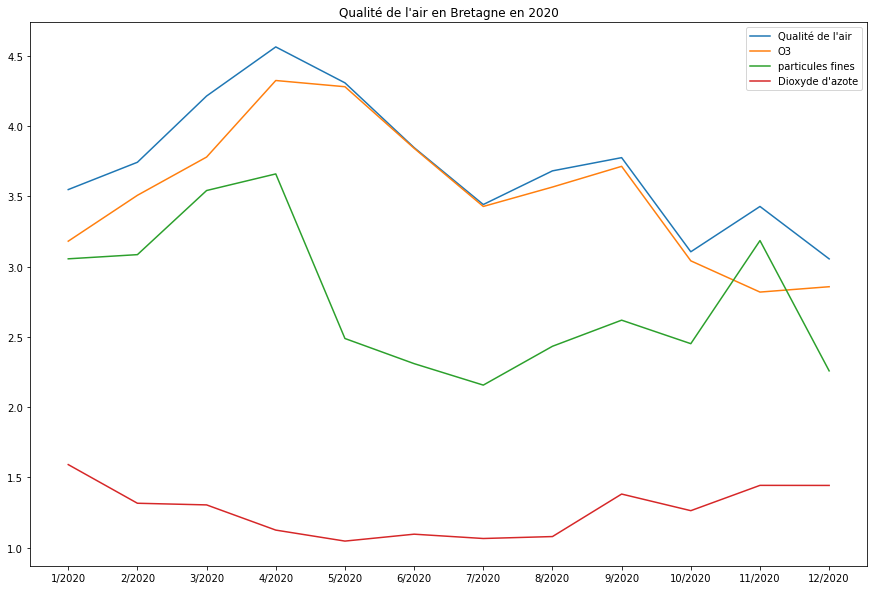

In [104]:
plt.figure(figsize=(15,10))
plt.title("Qualité de l'air en Bretagne en 2020")
plt.plot(date,dataBretagneMean['valeur'],label="Qualité de l'air")
plt.plot(date,dataBretagneMean['val_o3'],label='O3')
plt.plot(date,dataBretagneMean['val_pm10'],label='particules fines')
plt.plot(date,dataBretagneMean['val_no2'],label="Dioxyde d'azote")
plt.legend()
plt.show()

### Observation

On  observe ici une degradation de la qualité de l'air pendant la periode du confinement. En effet, ceci peut etre correlé a une forte augmentation des indices d'émissions de particules fines ainsi que celle d'azote (fortement émis par les chauffages domestiques ), couplé a diminution plus faible de l'indice d'émissions de dioxyde d'azote ( diminution de la circulation)

## Travail sur la cartographie

Mise en forme des datas pour l'exploitation géographique.


In [105]:
data.head()

,FID,valeur,qualif,source,type_zone,code_zone,lib_zone,val_no2,val_so2,val_o3,val_pm10,val_pm25,geom,couleur,date,year,month,day
0,ind_bretagne_agglo.fid--15c6355_17742f5266a_10d4,3,Bon,Air Breizh,EPCI,200069409,CA Saint-Brieuc Armor,0,0,0,0,0,POINT (269153.2682993477 6832824.934141148),#99E600,2021-01-01 10:00:00,2021,1,1
1,ind_bretagne_agglo.fid--15c6355_17742f5266a_10d5,3,Bon,Air Breizh,EPCI,200067932,CA Golfe du Morbihan - Vannes,0,0,0,0,0,POINT (269961.1106939723 6746307.8992528645),#99E600,2021-01-01 10:00:00,2021,1,1
2,ind_bretagne_agglo.fid--15c6355_17742f5266a_10d6,3,Bon,Air Breizh,EPCI,200068120,CA Quimper Bretagne Occidentale,0,0,0,0,0,POINT (172753.63056731108 6795400.543816281),#99E600,2021-01-01 10:00:00,2021,1,1
3,ind_bretagne_agglo.fid--15c6355_17742f5266a_10d7,3,Bon,Air Breizh,EPCI,243500139,Rennes Métropole,0,0,0,0,0,POINT (349555.0070453745 6789093.386528317),#99E600,2021-01-01 10:00:00,2021,1,1
4,ind_bretagne_agglo.fid--15c6355_17742f5266a_10d8,3,Bon,Air Breizh,EPCI,243500782,CA du Pays de Saint-Malo (Saint-Malo Aggloméra...,0,0,0,0,0,POINT (338719.75810268405 6844013.788199687),#99E600,2021-01-01 10:00:00,2021,1,1


In [106]:

coordX=[]
coordY=[]
inProj = Proj(init='epsg:2154')
outProj = Proj(init='epsg:4326')


for coord in data['geom']:
    temp_string = coord
    coord=[float(s) for s in re.findall(r'-?\d+\.?\d*', temp_string)]
    x1,y1 = coord[0],coord[1]
    x2,y2 = transform(inProj,outProj,x1,y1)
    coordX.append(x2)
    coordY.append(y2)





In [107]:
data['coordX']=coordX
data['coordY']=coordY
data.head()

,FID,valeur,qualif,source,type_zone,code_zone,lib_zone,val_no2,val_so2,val_o3,val_pm10,val_pm25,geom,couleur,date,year,month,day,coordX,coordY
0,ind_bretagne_agglo.fid--15c6355_17742f5266a_10d4,3,Bon,Air Breizh,EPCI,200069409,CA Saint-Brieuc Armor,0,0,0,0,0,POINT (269153.2682993477 6832824.934141148),#99E600,2021-01-01 10:00:00,2021,1,1,-2.832059,48.452434
1,ind_bretagne_agglo.fid--15c6355_17742f5266a_10d5,3,Bon,Air Breizh,EPCI,200067932,CA Golfe du Morbihan - Vannes,0,0,0,0,0,POINT (269961.1106939723 6746307.8992528645),#99E600,2021-01-01 10:00:00,2021,1,1,-2.736238,47.676516
2,ind_bretagne_agglo.fid--15c6355_17742f5266a_10d6,3,Bon,Air Breizh,EPCI,200068120,CA Quimper Bretagne Occidentale,0,0,0,0,0,POINT (172753.63056731108 6795400.543816281),#99E600,2021-01-01 10:00:00,2021,1,1,-4.085219,48.045952
3,ind_bretagne_agglo.fid--15c6355_17742f5266a_10d7,3,Bon,Air Breizh,EPCI,243500139,Rennes Métropole,0,0,0,0,0,POINT (349555.0070453745 6789093.386528317),#99E600,2021-01-01 10:00:00,2021,1,1,-1.711339,48.108092
4,ind_bretagne_agglo.fid--15c6355_17742f5266a_10d8,3,Bon,Air Breizh,EPCI,243500782,CA du Pays de Saint-Malo (Saint-Malo Aggloméra...,0,0,0,0,0,POINT (338719.75810268405 6844013.788199687),#99E600,2021-01-01 10:00:00,2021,1,1,-1.902423,48.595360


In [108]:
data.groupby('geom').mean()

,valeur,code_zone,val_no2,val_so2,val_o3,val_pm10,val_pm25,year,month,day,coordX,coordY
geom,,,,,,,,,,,,
POINT (147878.22420658765 6837175.794037035),3.819945,242900314.0,1.290859,0.0,3.598338,2.916898,0.0,2020.002770,6.578947,15.639889,-4.470520,48.399641
POINT (172753.63056731108 6795400.543816281),3.713115,200068120.0,1.150273,0.0,3.565574,2.655738,0.0,2020.002732,6.510929,15.691257,-4.085219,48.045952
POINT (229772.04043578357 6768639.926683848),3.731507,200042174.0,1.246575,0.0,3.550685,2.687671,0.0,2020.002740,6.523288,15.706849,-3.293846,47.849403
POINT (269153.2682993477 6832824.934141148),3.660274,200069409.0,1.235616,0.0,3.479452,2.641096,0.0,2020.002740,6.520548,15.709589,-2.832059,48.452434
POINT (269961.1106939723 6746307.8992528645),3.723288,200067932.0,1.263014,0.0,3.536986,2.632877,0.0,2020.002740,6.523288,15.706849,-2.736238,47.676516
POINT (338719.75810268405 6844013.788199687),3.757576,243500782.0,1.181818,0.0,3.479339,3.011019,0.0,2020.002755,6.542700,15.710744,-1.902423,48.595360
POINT (349555.0070453745 6789093.386528317),3.646409,243500139.0,1.439227,0.0,3.411602,2.748619,0.0,2020.002762,6.555249,15.798343,-1.711339,48.108092


Text(0, 0.5, 'latitude')

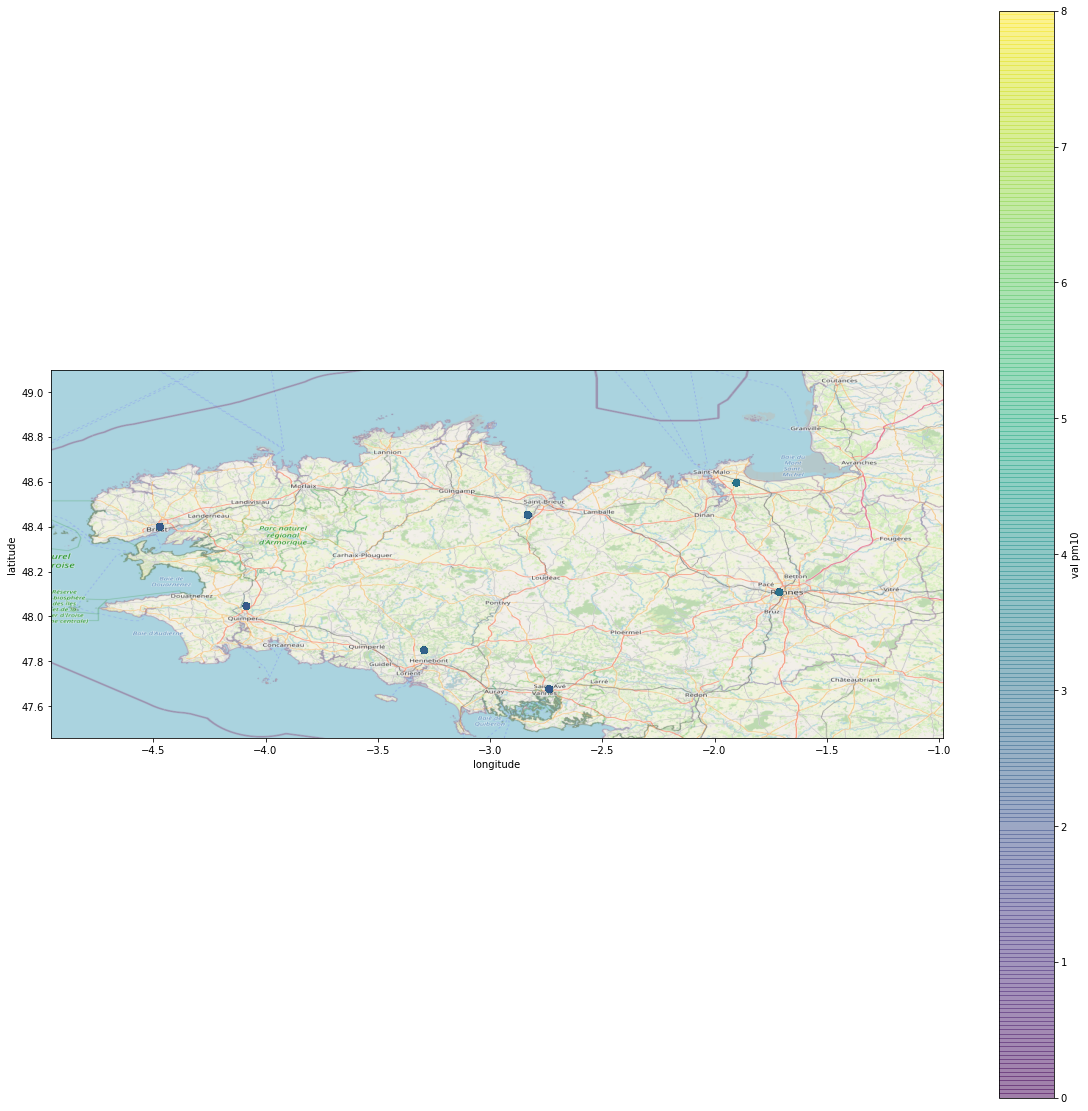

In [109]:
plt.figure(figsize=(20,20))

bretagne=plt.imread("map.png")
plt.imshow(bretagne,zorder=0,extent=[-4.9576,-0.9805,47.4567,49.0980])

plt.scatter(data['coordX'],data['coordY'],alpha=0.5,c=data['val_pm10'],cmap = plt.get_cmap('viridis'))
plt.colorbar(label="val pm10")
plt.xlabel("longitude")

plt.ylabel("latitude")